# this is to make scatter plots from a dds dataset from bulkRNAseq analysis, it uses normalized counts and calculates pairwise t-tests

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from scipy import stats
from statsmodels.stats.multitest import multipletests

import dataset

In [3]:
df = pd.read_csv('normalized_counts_dds.csv', index_col = 0)
meta_data = pd.read_csv('meta_data_subset_object.csv', index_col = 0)

#to concatenate dataframes, the index columns must match -> transpose count matrix
df = df.T

data = pd.concat([df, meta_data], axis = 1)

on to the plotting

<Figure size 1000x600 with 0 Axes>

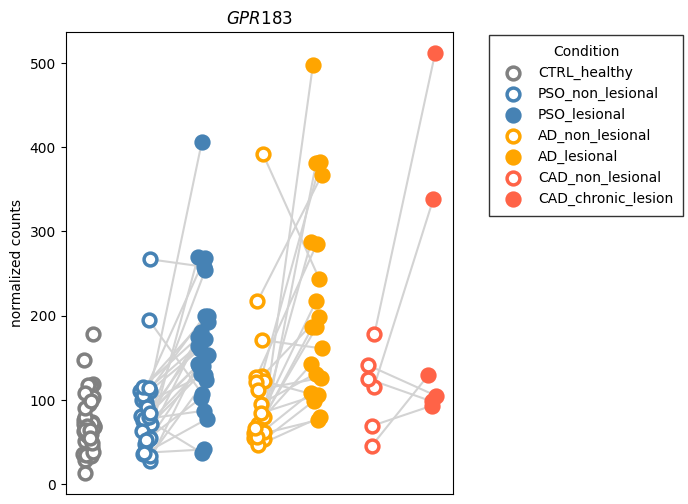

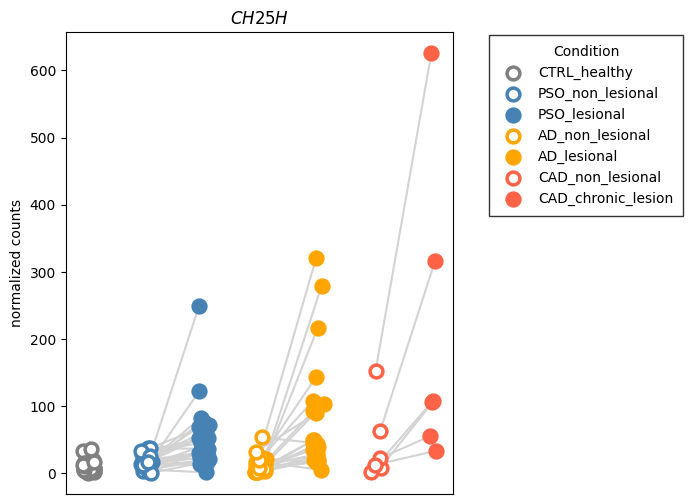

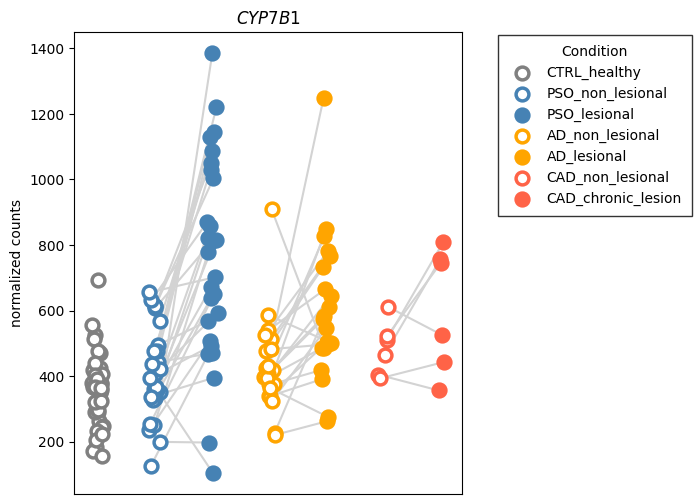

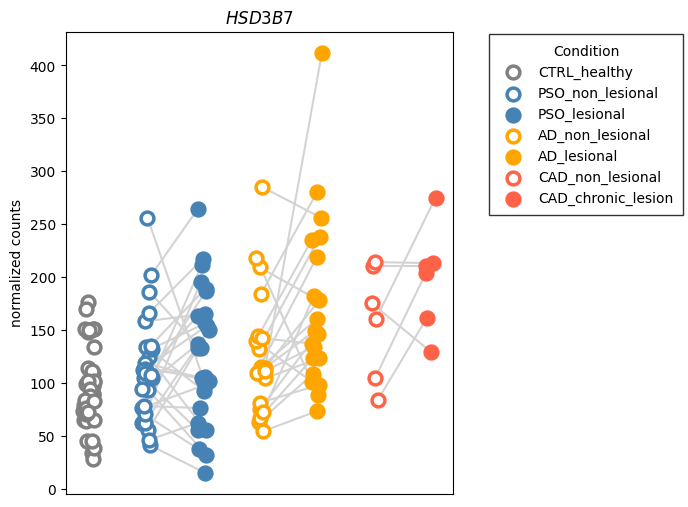

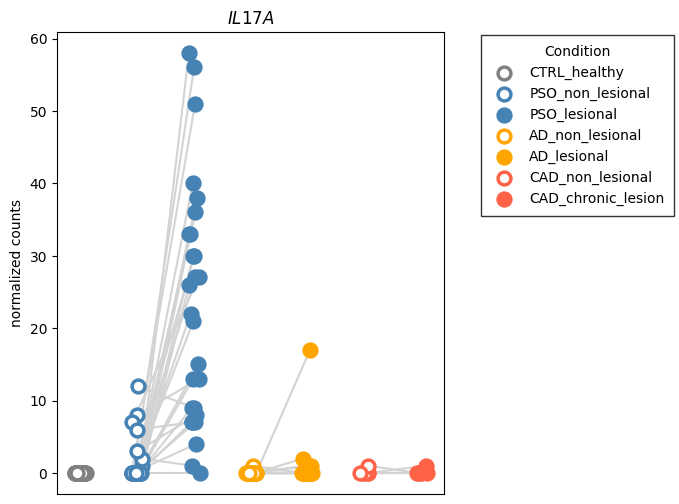

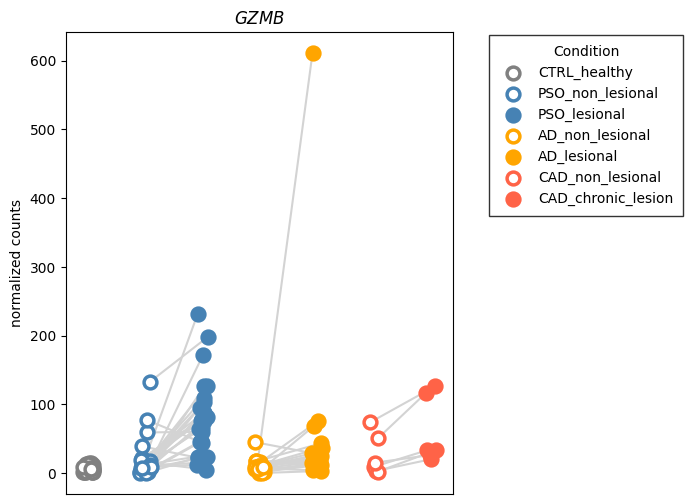

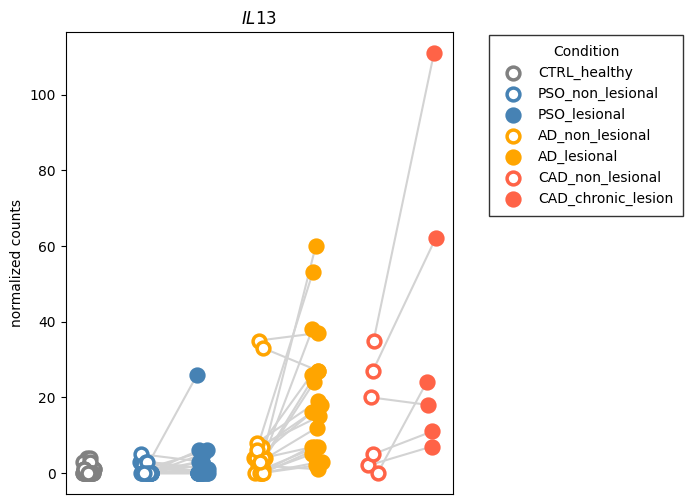

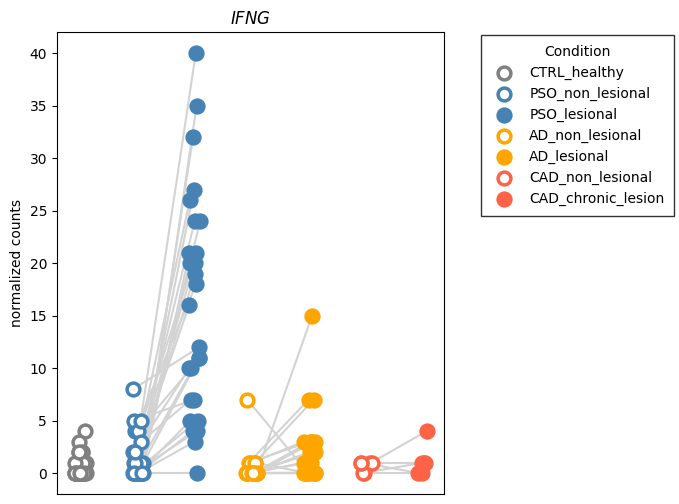

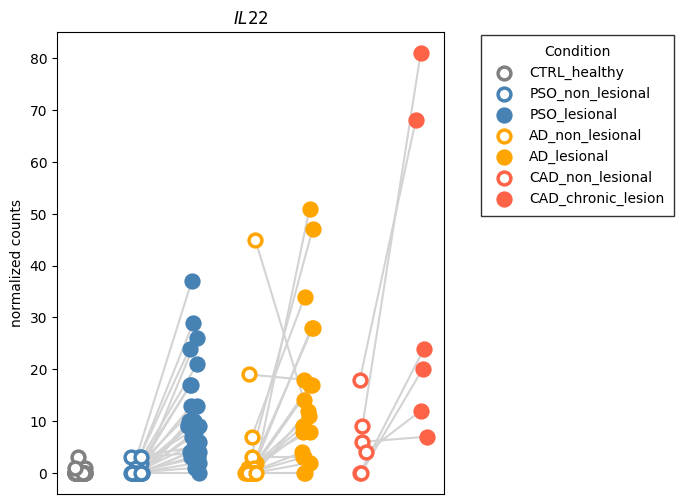

In [4]:
plt.figure(figsize=[10, 6])

targets = ['GPR183', 'CH25H', 'CYP7B1', 'HSD3B7', 'IL17A', 'GZMB', 'IL13', 'IFNG', 'IL22']  # Replace with your actual targets

for target in targets:
    plt.figure(figsize=[5, 6])

    # set order of the x axis
    x_order = ['CTRL_healthy', 'PSO_non_lesional', 'PSO_lesional',
               'AD_non_lesional', 'AD_lesional', 'CAD_non_lesional', 'CAD_chronic_lesion']
    # Convert 'condition' to a categorical type
    data['condition'] = pd.Categorical(
        data['condition'], categories=x_order, ordered=True)

    custom_palette = sns.color_palette(
        ['white', 'white', 'steelblue', 'white', 'orange', 'white', 'tomato'])

    border_colors = ['grey', 'steelblue', 'steelblue',
                     'orange', 'orange', 'tomato', 'tomato']

    # Add jitter to 'condition' column
    data['jittered_condition'] = data['condition'].cat.codes + \
        np.random.uniform(-0.1, 0.1, len(data))

    # Create the scatter plot
    for i, condition in enumerate(x_order):
        subset = data[data['condition'] == condition]
        sns.scatterplot(data=subset,
                        x='jittered_condition',
                        y=target,
                        color=custom_palette[i],
                        s=85,
                        edgecolor=border_colors[i],
                        linewidth=2.5,
                        zorder=2,
                        legend=False)

    # Manually add a legend
    legend = plt.legend(title='Condition',
                        labels=x_order,
                        loc='upper right',
                        bbox_to_anchor=(1.6, 1))

    # Make the legend border thicker and black
    legend.get_frame().set_linewidth(1)
    legend.get_frame().set_edgecolor("black")
    legend.get_frame().set_boxstyle("square")

    # Group the data by 'patient.id' and draw lines between points in the same group
    for name, group in data.groupby('patient.id'):
        plt.plot(group['jittered_condition'],
                group[target], color='lightgrey', zorder=1)

    # Add labels and title
    plt.xlabel('')
    plt.ylabel('normalized counts')
    plt.title(f'${target}$', weight='bold')

    # Remove x-axis labels and ticks
    plt.xticks([], [])

    # Save the figure
    plt.savefig(f'scatterplot{target}.png', dpi=300, bbox_inches='tight')

    plt.show()